In [4]:
import numpy as np

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [5]:
def unet(input_img):
    # padding = 0 , stride = 1
    # input image = 572*572
    c1 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='valid')(input_img) #570*570
    c2 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='valid')(c1) # 568*568
    mp1 = MaxPool2D(pool_size=(2,2))(c2) # 284*284
    c3 = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid')(mp1) # 282*282
    c4 = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid')(c3) # 280*280
    mp2 = MaxPool2D(pool_size=(2,2))(c4) # 140*140
    c5 = Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='valid')(mp2) # 138*138
    c6 = Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='valid')(c5) # 136*136
    mp3 = MaxPool2D(pool_size=(2,2))(c6) # 68*68
    c7 = Conv2D(filters=512, kernel_size=(3,3))(mp3) # 66*66
    c8 = Conv2D(filters=512, kernel_size=(3,3))(c7) # 64*64
    mp4 = MaxPool2D(pool_size=(2,2))(c8) # 32*32
    dr1 = Dropout()
    c9 = Conv2D(filters=1024, kernel_size=(3,3))(mp4) # 30*30
    c10 = Conv2D(filters=1024, kernel_size=(3,3))(c9) # 28*28
    
    #upsampling followed by a 2x2 convolution
#     up1 = UpSampling2D(size=(2,2))(c10) # 56*56
    # up convolve
    up1 = Conv2DTranspose(512, (2,2), strides=(2,2), padding='valid')(c10)    # concatenate c8
    cropped_1 = Cropping2D(cropping=((4, 4), (4, 4)))(c8) # 56*56
    merge1 = concatenate([cropped_1, up1]) # 56*56
    c11 = Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='valid')(merge1) # 54*54
    c12 = Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='valid')(c11) # 52*52
#     up2 = UpSampling2D(size=(2,2))(c12) # 104*104
    up2 = Conv2DTranspose(256, (2,2), strides=(2,2), padding='valid')(c12)

    # concatenate c6
    cropped_2 = Cropping2D(cropping=((16, 16), (16, 16)))(c6) # 104*104
    merge2 = concatenate([cropped_2, up2]) # 104*104
    c13 = Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='valid')(merge2) # 102*102
    c14 = Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='valid')(c13) # 100*100
#     up3 = UpSampling2D(size=(2,2))(c14) # 200*200
    up3 = Conv2DTranspose(128, (2,2), strides=(2,2), padding='valid')(c14)
#     # concatenate c4
    cropped_3 = Cropping2D(cropping=((40, 40), (40, 40)))(c4)
    merge3 = concatenate([cropped_3, up3])
    c15 = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid')(merge3) # 198*198
    c16 = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid')(c15) #196*196
#     up4 = UpSampling2D(size=(2,2))(c16) #392*392
    up4 = Conv2DTranspose(64, (2,2), strides=(2,2), padding='valid')(c16)
#     # conctenate c2
    cropped_4 = Cropping2D(cropping=((88, 88), (88, 88)))(c2)
    merge4 = concatenate([cropped_4, up4])
    c17 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='valid')(merge4) #390*390
    c18 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='valid')(c17) #388*388
    # filters here need to be the nu,ber of classes
    c19 = Conv2D(filters=1, kernel_size=(1,1), padding='same', activation='sigmoid')(c18) #388*388
    
    return c19

In [6]:
input_img = Input(shape = (572, 572, 3))
model = Model(input_img, unet(input_img))

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 572, 572, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 570, 570, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 568, 568, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 284, 284, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [12]:
import cv2

import matplotlib.pyplot as plt

%matplotlib inline  

In [21]:
img = cv2.imread('../train/03a857ce842d_07.jpg')
# img = cv2.resize(img,(320, 160))

In [22]:
# gives height and width
img.shape

(1280, 1918, 3)

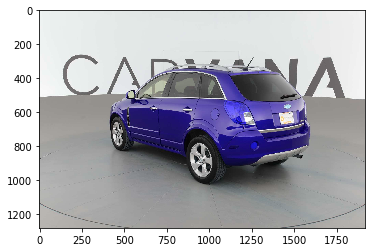

In [25]:
plt.imshow(img)

In [36]:
# pass width and then height
cv2.resize(img, (864, 576)).shape[:2][::-1]

(864, 576)

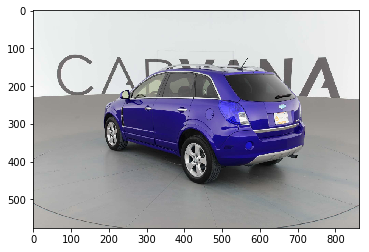

In [24]:
plt.imshow(cv2.resize(img, (864, 576)))

In [77]:
def compare_images(left_image, right_image):    
    print(img.shape)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(left_image)
    ax1.set_title('Shape '+ str(left_image.shape),
                  fontsize=50)
#     ax2.imshow(right_image)
    ax2.imshow(np.uint8(right_image))
    ax2.set_title('Shape '+ str(right_image.shape)
                  , fontsize=50)
    plt.show()

(160, 320, 3)


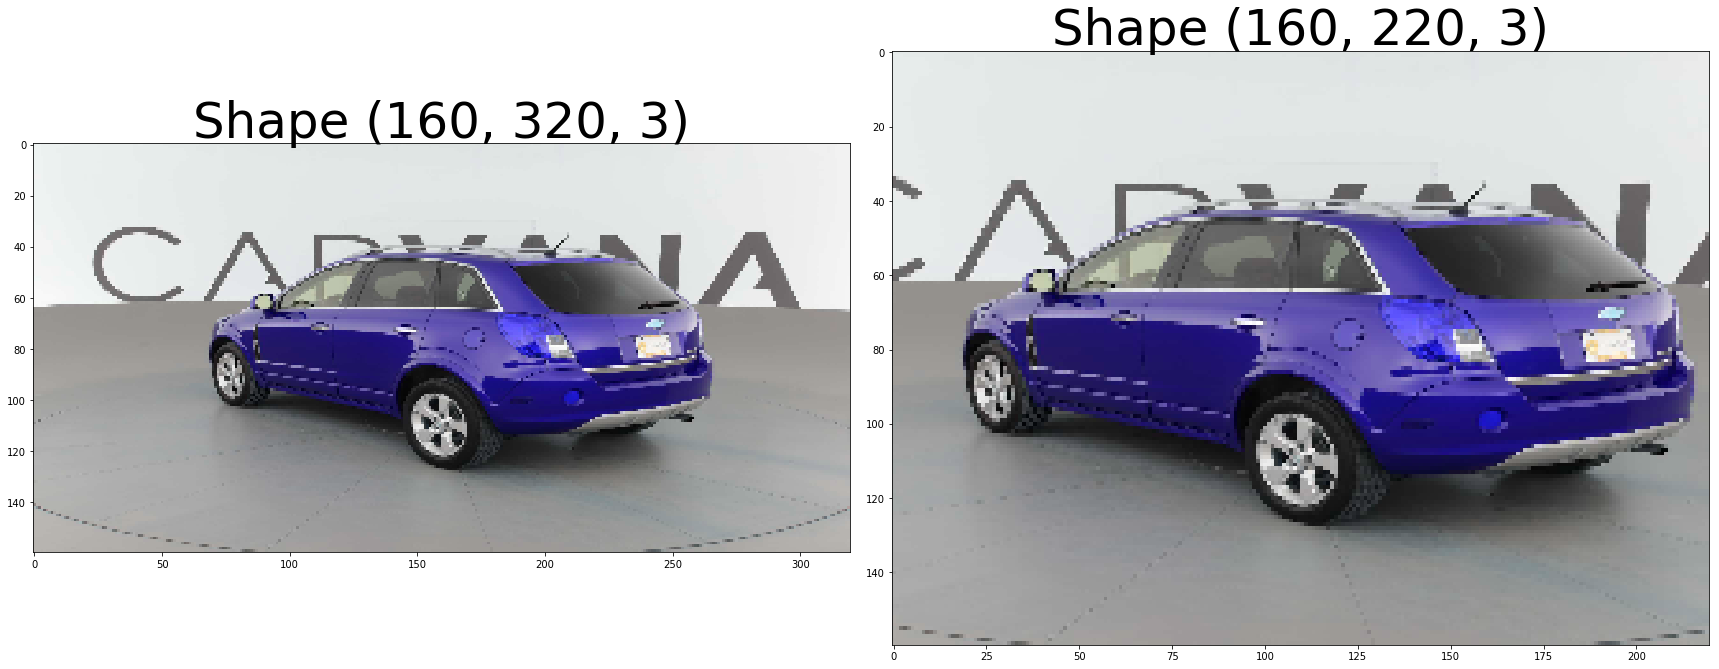

In [93]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Cropping2D
from tensorflow.keras.models import Sequential
# with a Sequential model
model = Sequential()
model.add(Cropping2D(cropping=((0, 0), (50, 50)), input_shape=img.shape))
cropping_output = K.function([model.layers[0].input],
                                  [model.layers[0].output])
cropped_image = cropping_output([img[None,...]])[0]
compare_images(img,
               cropped_image.reshape(cropped_image.shape[1:]))

In [ ]:
# example of using transpose conv in a simple generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from keras.layers import Conv2D

In [110]:
# define model
model = Sequential()
# define input shape, output enough activations for for 128 5x5 image
model.add(Dense(128 * 5 * 5, input_dim=100))
# reshape vector of activations into 128 feature maps with 5x5
model.add(Reshape((5, 5, 128)))
# double input from 128 5x5 to 1 10x10 feature map
model.add(Conv2DTranspose(1, (2,2), strides=(2,2), padding='valid'))
# summarize model
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 3200)              323200    
_________________________________________________________________
reshape_6 (Reshape)          (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 10, 10, 1)         513       
Total params: 323,713
Trainable params: 323,713
Non-trainable params: 0
_________________________________________________________________
